In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

In [53]:
data_load = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv')

In [3]:
data_load

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No
...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,Clothing,Los Angeles,95.068658,414.231539,desktop,Yes
9996,9997,4879,764.834233,2023-01-07 22:36:00,Clothing,Los Angeles,902.506946,1090.687430,mobile,No
9997,9998,2624,882.096776,2023-01-07 22:37:00,Travel,New York,531.237353,186.667431,mobile,No
9998,9999,4907,1.000000,2023-01-07 22:38:00,Dining,Chicago,0.000000,116.343224,desktop,No


In [4]:
data_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


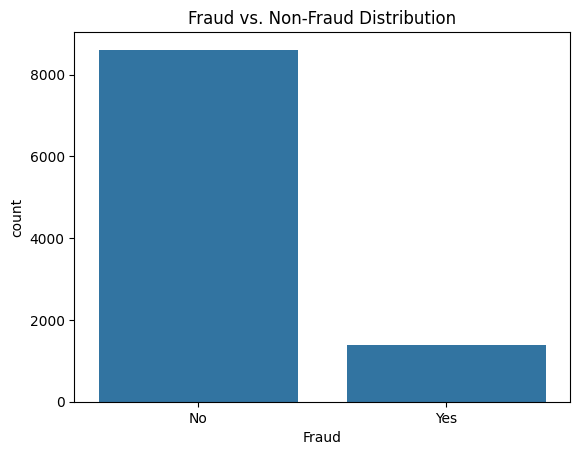

In [7]:
sns.countplot(x='Fraud', data=data_load)
plt.title('Fraud vs. Non-Fraud Distribution')
plt.show()

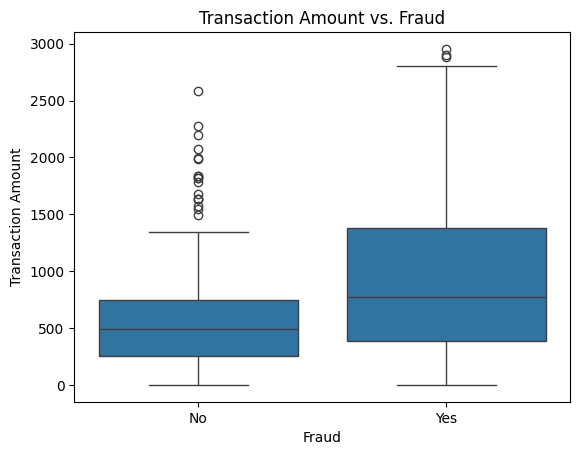

In [12]:

sns.boxplot(x='Fraud', y='Transaction Amount', data=data_load)
plt.title('Transaction Amount vs. Fraud')
plt.show()

It seems fraud usually occurs with higher transaction amounts.

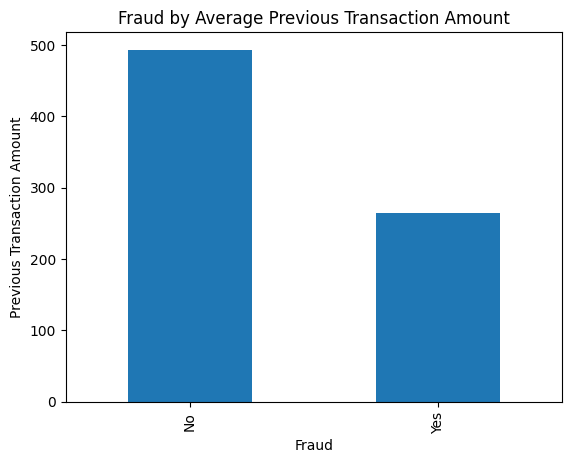

In [17]:
data_load.groupby('Fraud')['Previous Transaction Amount'].mean().plot(kind='bar')
plt.title('Fraud by Average Previous Transaction Amount')
plt.ylabel('Previous Transaction Amount')
plt.show()

<Axes: xlabel='Location', ylabel='Count'>

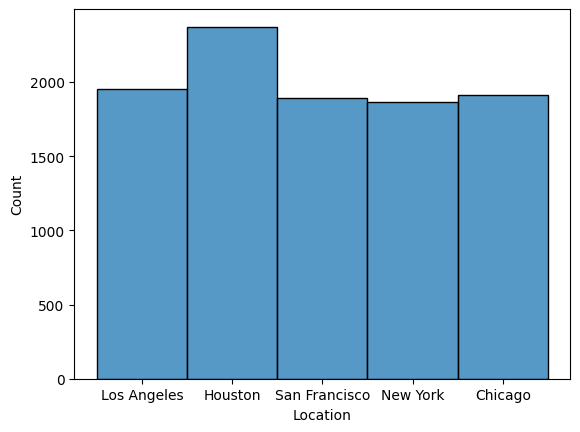

In [18]:
sns.histplot(data_load['Location'])

Most transactions occur in Houston.

<Axes: xlabel='Device Type', ylabel='Count'>

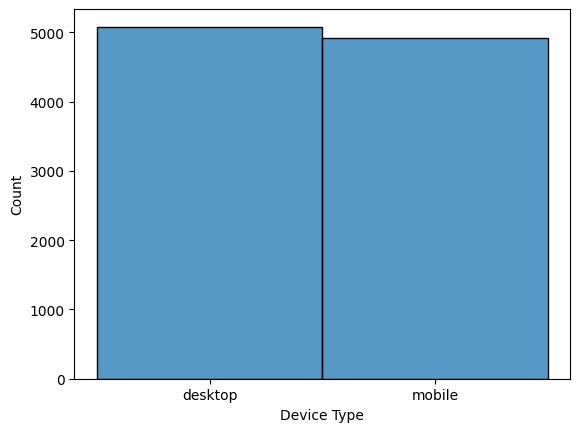

In [19]:
sns.histplot(data_load['Device Type'])

Fairly even split between device types.

<Axes: xlabel='Merchant Category', ylabel='Count'>

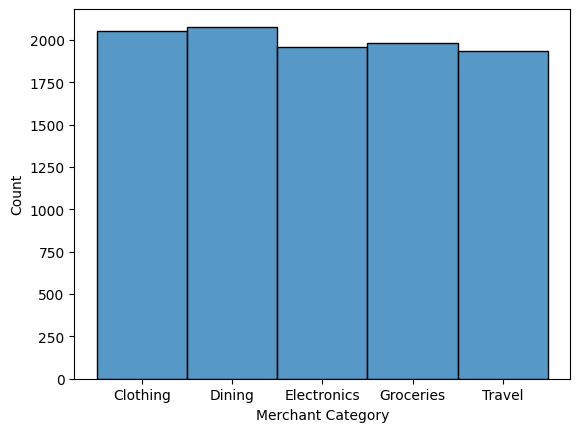

In [20]:
sns.histplot(data_load['Merchant Category'])

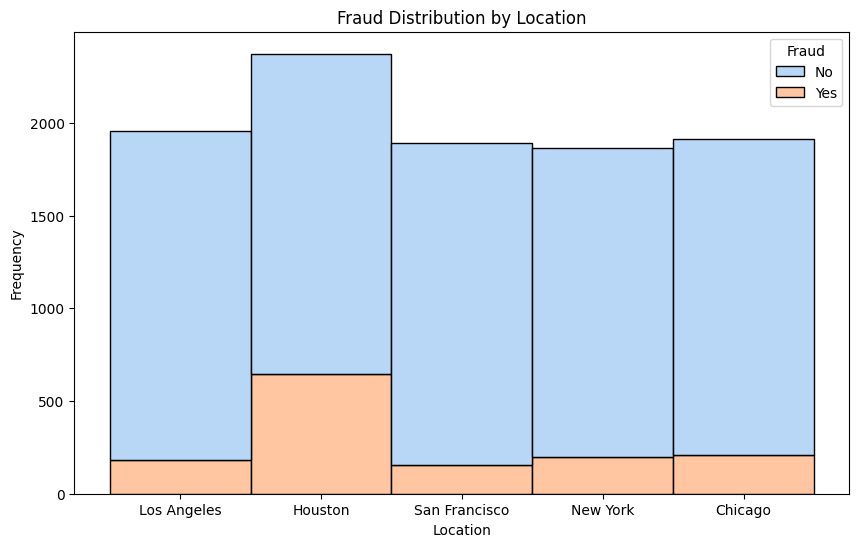

In [23]:
# Plotting histogram with different pastel colors for location
plt.figure(figsize=(10, 6))
sns.histplot(data=data_load, x='Location', hue='Fraud', multiple='stack', palette=pastel_colors)
plt.title('Fraud Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

Fraud primarily happens in Houston - however most transactions occur in Houston
- Houston has most transactions and fraud maybe focus efforts on fraud reduction here

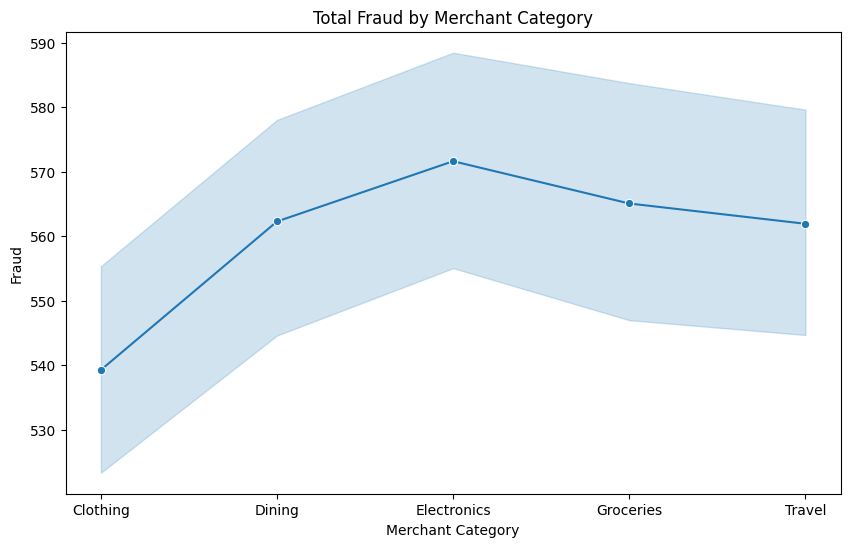

In [27]:
# Plotting line plot for total fraud by transaction date and time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_load, x='Merchant Category', y='Transaction Amount', marker='o')
plt.title('Total Fraud by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Transaction Amount')
plt.show()

Transaction Amount higher for electronics (usually more costly items)

In [90]:
# Encode categorical variables
categorical_cols = ['Merchant Category', 'Location','Device Type', 'Fraud', 'Merchant Category']
data = pd.get_dummies(data_load, columns=categorical_cols, dtype=int)

In [91]:
data

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Previous Transaction Amount,Time Since Last Transaction,hour,Merchant Category_Clothing,Merchant Category_Dining,Merchant Category_Electronics,...,Location_San Francisco,Device Type_desktop,Device Type_mobile,Fraud_No,Fraud_Yes,Merchant Category_Clothing,Merchant Category_Dining,Merchant Category_Electronics,Merchant Category_Groceries,Merchant Category_Travel
0,1,4174,659.297095,2023-01-01 00:00:00,579.323704,481.377516,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
1,2,4507,474.046452,2023-01-01 00:01:00,407.220271,1159.211075,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
2,3,1860,498.819570,2023-01-01 00:02:00,265.583605,720.677284,0,0,1,0,...,1,1,0,1,0,0,1,0,0,0
3,4,2294,744.199592,2023-01-01 00:03:00,1097.259081,1.000000,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,5,2130,279.181247,2023-01-01 00:04:00,238.389682,1378.958721,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,95.068658,414.231539,22,1,0,0,...,0,1,0,0,1,1,0,0,0,0
9996,9997,4879,764.834233,2023-01-07 22:36:00,902.506946,1090.687430,22,1,0,0,...,0,0,1,1,0,1,0,0,0,0
9997,9998,2624,882.096776,2023-01-07 22:37:00,531.237353,186.667431,22,0,0,0,...,0,0,1,1,0,0,0,0,0,1
9998,9999,4907,1.000000,2023-01-07 22:38:00,0.000000,116.343224,22,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction ID                 10000 non-null  int64  
 1   Customer ID                    10000 non-null  int64  
 2   Transaction Amount             10000 non-null  float64
 3   Transaction Date and Time      10000 non-null  object 
 4   Previous Transaction Amount    10000 non-null  float64
 5   Time Since Last Transaction    10000 non-null  float64
 6   Merchant Category_Clothing     10000 non-null  bool   
 7   Merchant Category_Dining       10000 non-null  bool   
 8   Merchant Category_Electronics  10000 non-null  bool   
 9   Merchant Category_Groceries    10000 non-null  bool   
 10  Merchant Category_Travel       10000 non-null  bool   
 11  Location_Chicago               10000 non-null  bool   
 12  Location_Houston               10000 non-null  

In [56]:
#Group transaction and prev transaction amount by Very high, high, medium, low
data['Transaction Level'] = pd.qcut(data['Transaction Amount'], q=4, labels=['Low', 'Med', 'High', 'Very High'])
data['Previous Transaction Level'] = pd.qcut(data['Previous Transaction Amount'], q=4, labels=['Low', 'Med', 'High', 'Very High'])
print(data)

      Transaction ID  Customer ID  Transaction Amount  \
0                  1         4174          659.297095   
1                  2         4507          474.046452   
2                  3         1860          498.819570   
3                  4         2294          744.199592   
4                  5         2130          279.181247   
...              ...          ...                 ...   
9995            9996         1524         1475.988992   
9996            9997         4879          764.834233   
9997            9998         2624          882.096776   
9998            9999         4907            1.000000   
9999           10000         4113          158.950264   

     Transaction Date and Time  Previous Transaction Amount  \
0          2023-01-01 00:00:00                   579.323704   
1          2023-01-01 00:01:00                   407.220271   
2          2023-01-01 00:02:00                   265.583605   
3          2023-01-01 00:03:00                  1097.259081   


<Axes: xlabel='Transaction Level', ylabel='Count'>

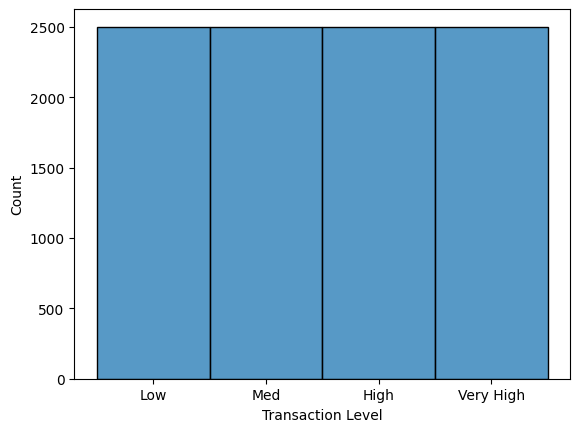

In [12]:
sns.histplot(data['Transaction Level'])

In [29]:
# Check correlation with heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

TOOK TOO LONG TO PROCESS

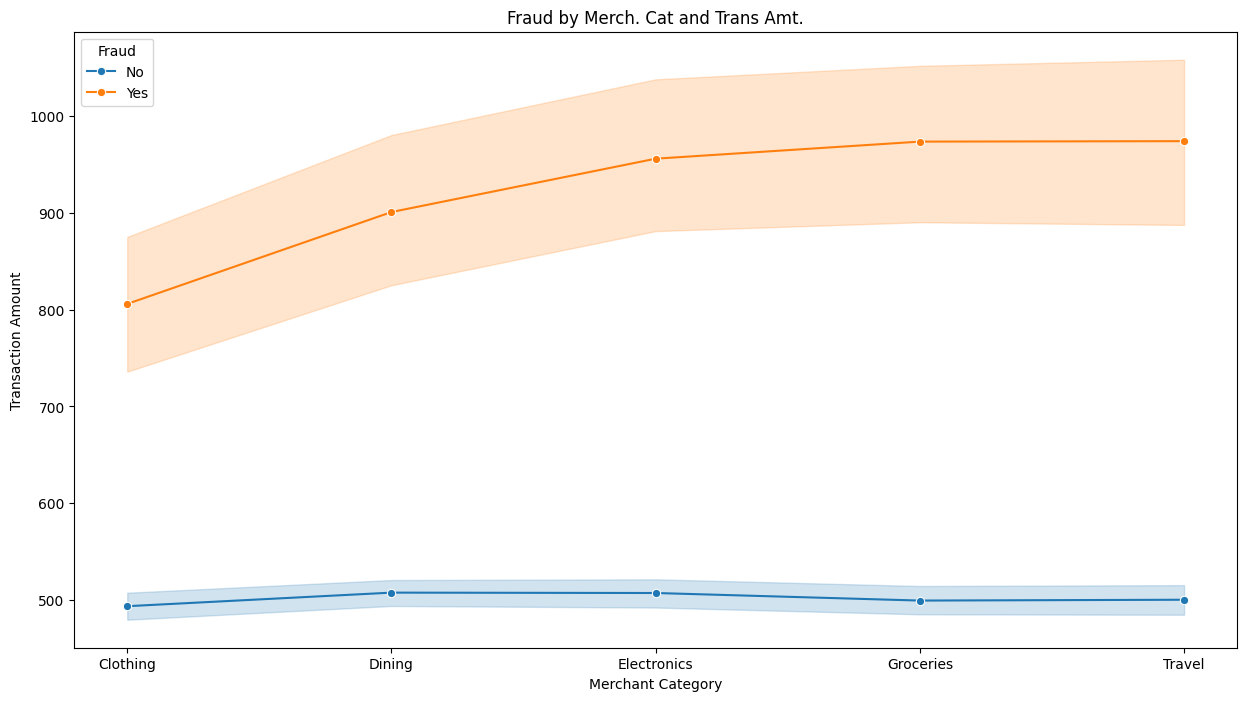

In [5]:
# Plot 
plt.figure(figsize=(15, 8))
sns.lineplot(data=data_load, x='Merchant Category', y='Transaction Amount', hue='Fraud', marker='o')
plt.title('Fraud by Merch. Cat and Trans Amt.')
plt.xlabel('Merchant Category')
plt.ylabel('Transaction Amount')
plt.show()

<Axes: xlabel='Time Since Last Transaction', ylabel='Count'>

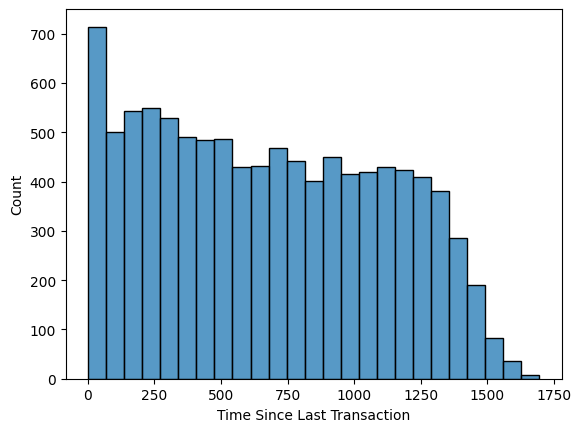

In [6]:
sns.histplot(data_load['Time Since Last Transaction'])

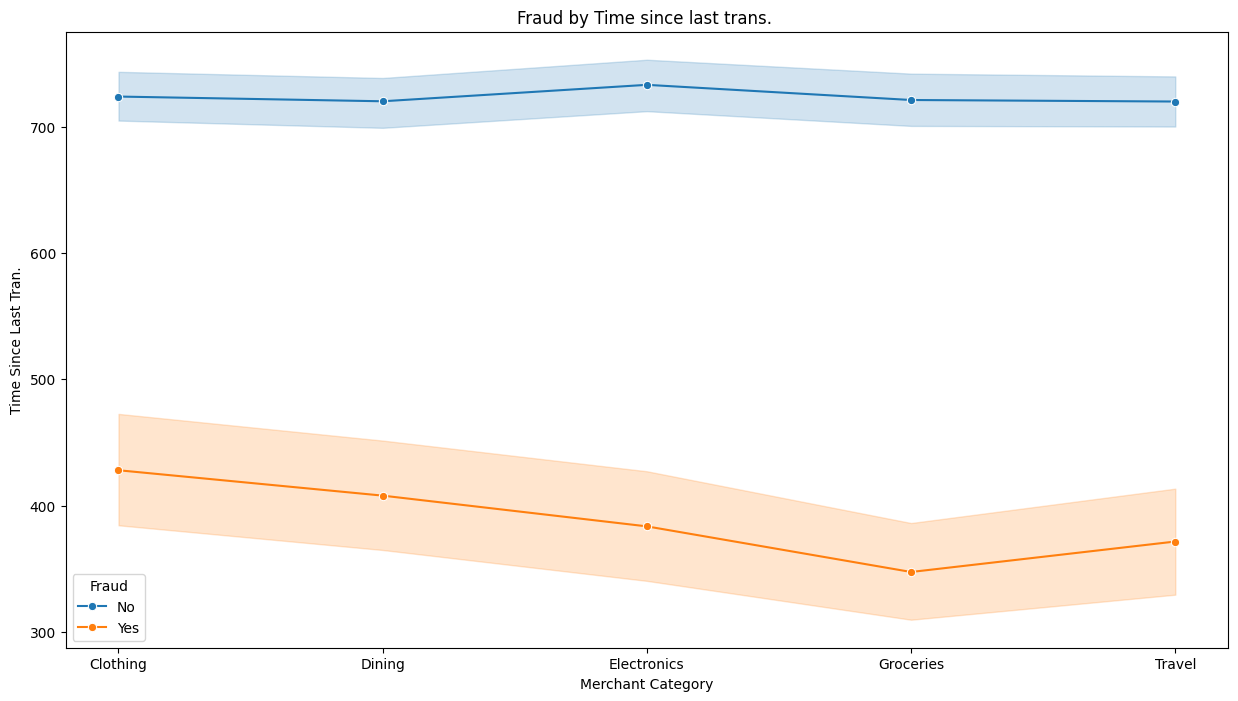

In [15]:
# Plot 
plt.figure(figsize=(15, 8))
sns.lineplot(data=data_load, x='Merchant Category', y='Time Since Last Transaction', hue='Fraud', marker='o')
plt.title('Fraud by Time since last trans. ')
plt.xlabel('Merchant Category')
plt.ylabel('Time Since Last Tran.')
plt.show()

In [61]:
data_load['Transaction Date and Time'] = pd.to_datetime(data_load['Transaction Date and Time'])

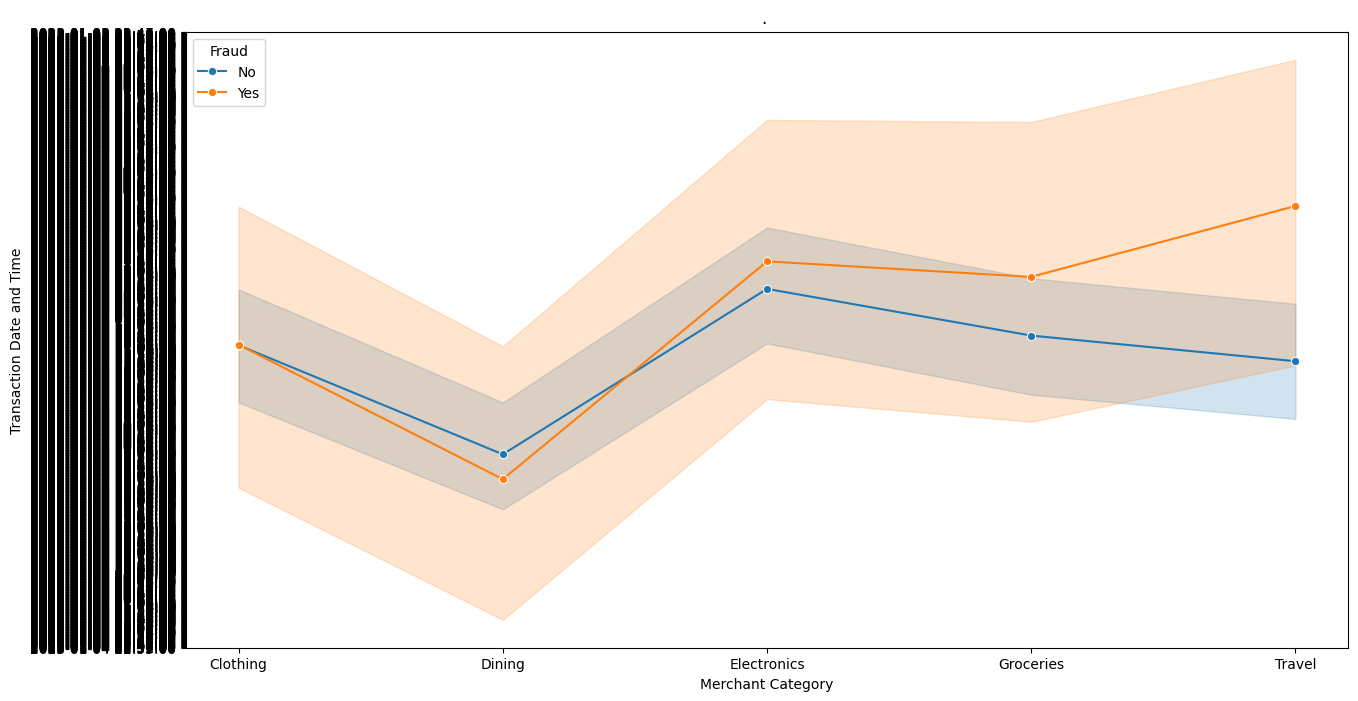

In [17]:
# Plot 
plt.figure(figsize=(15, 8))
sns.lineplot(data=data_load, x='Merchant Category', y='Transaction Date and Time', hue='Fraud', marker='o')
plt.title('. ')
plt.xlabel('Merchant Category')
plt.ylabel('Transaction Date and Time')
plt.show()

In [78]:
data['hour'] = data['Transaction Date and Time'].apply(lambda x: x.hour)

<Axes: xlabel='hour', ylabel='Count'>

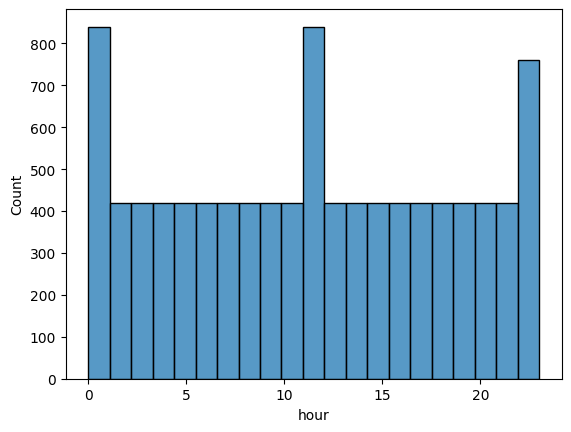

In [30]:
sns.histplot(data_load['hour'])

In [31]:
data_load.groupby('Fraud')['Time Since Last Transaction'].count()

Fraud
No     8608
Yes    1392
Name: Time Since Last Transaction, dtype: int64

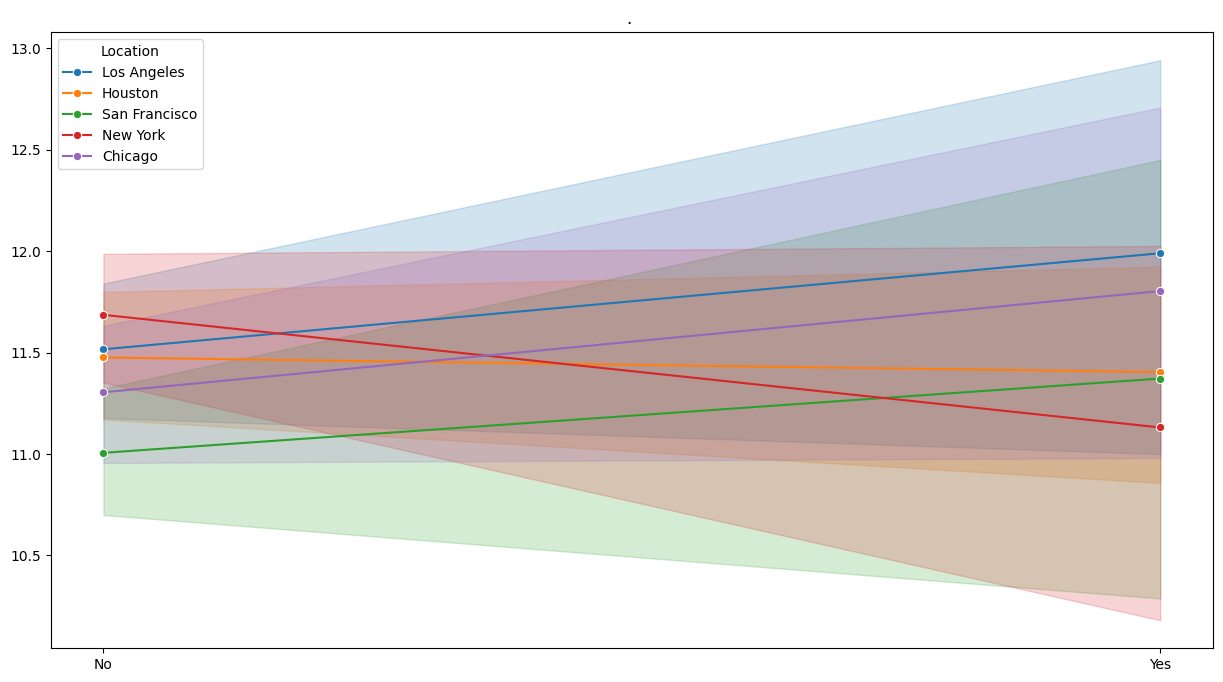

In [39]:
# Plot 
plt.figure(figsize=(15, 8))
sns.lineplot(data=data_load, x='Fraud', y='hour', hue='Location', marker='o')
plt.title('. ')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [92]:
# Define features and target variable
X = data[['hour','Transaction Amount','Time Since Last Transaction','Merchant Category_Clothing','Merchant Category_Dining','Merchant Category_Electronics','Merchant Category_Groceries','Merchant Category_Travel']]
y = data_load[['Fraud']]

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.exceptions import NotFittedError

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
from sklearn.preprocessing import StandardScaler

In [94]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
# Define models to compare
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
    }

# Dictionary to store cross-validation results
cv_results = {}

# Perform cross-validation and evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Average cross-validation score for {name}: {cv_scores.mean()}")
    cv_results[name] = cv_scores.mean()
    

Evaluating Random Forest...


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConvers

Cross-validation scores for Random Forest: [0.909375 0.895625 0.89625  0.90375  0.9     ]
Average cross-validation score for Random Forest: 0.901
Evaluating Gradient Boosting...


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.p

Cross-validation scores for Gradient Boosting: [0.913125 0.90125  0.9025   0.905625 0.904375]
Average cross-validation score for Gradient Boosting: 0.905375
Evaluating Logistic Regression...
Cross-validation scores for Logistic Regression: [0.90625  0.8975   0.895    0.899375 0.89875 ]
Average cross-validation score for Logistic Regression: 0.899375
Evaluating K-Nearest Neighbors...


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataC

Cross-validation scores for K-Nearest Neighbors: [0.903125 0.89375  0.8925   0.890625 0.89625 ]
Average cross-validation score for K-Nearest Neighbors: 0.8952500000000001
Evaluating Decision Tree...
Cross-validation scores for Decision Tree: [0.81875 0.815   0.8275  0.82    0.815  ]
Average cross-validation score for Decision Tree: 0.8192499999999999


In [ ]:
#Random forest hass best model

In [106]:
rf = RandomForestClassifier()

In [112]:
rf.fit(X_train, y_train)

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [113]:
pred_train1 = rf.predict(X_train)
pred_test1 = rf.predict(X_test)

In [109]:
print(accuracy_score(pred_train1, y_train))
print(accuracy_score(pred_test1, y_test))

0.999875
0.8905


the data is overfitted because there is a bit of a gap and the train data is almost perfect

In [110]:
# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [116]:
# Evaluate the decision tree model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy for RF: {accuracy}')
print(f'RF Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'RF Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print('---------------------------------------')

Test accuracy for RF: 0.894
RF Classification Report:
              precision    recall  f1-score   support

          No       0.90      0.99      0.94      1714
         Yes       0.81      0.34      0.48       286

    accuracy                           0.89      2000
   macro avg       0.85      0.66      0.71      2000
weighted avg       0.89      0.89      0.87      2000

RF Confusion Matrix:
[[1691   23]
 [ 189   97]]
---------------------------------------


In [118]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [119]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best parameters for Random Forest: {grid_search.best_params_}")

# Train the Random Forest model
best_rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy for Random Forest: {accuracy}')
print(f'Random Forest Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print('---------------------------------------')

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConvers

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test accuracy for Random Forest: 0.9005
Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.90      1.00      0.94      1714
         Yes       0.92      0.33      0.49       286

    accuracy                           0.90      2000
   macro avg       0.91      0.66      0.72      2000
weighted avg       0.90      0.90      0.88      2000

Random Forest Confusion Matrix:
[[1706    8]
 [ 191   95]]
---------------------------------------


In [141]:
rf_best = RandomForestClassifier('n_estimators' [200], 'max_depth'[10],'min_samples_split'[5])
rf_best= rf_best.fit(X_train, y_train)
plt.figure()

IndexError: string index out of range

#Hypotheis: Time of hour and category do not affect fraud levels.
Alternate: They do affect fraud levels.

The hypothesis is null, it has shown that time of hour and catgeory do affect fraud levels. Electronics and evening being the highest fraud levels.

I built the model using after comparing a few models. Random forest had the best accuracy score. After hypertuning, the model performed with a high precision of correctly identifying fraud with precision of 92%, it also has a low score for incorrectly predicting fraud.

It has a high F1 score for no fraud predictions.
The confusion matrix shows that it only misclassifies a small percentage of non fraud (it misses a small percentage of fraud by classifiying it as not fraud). It does miss some fraud by incorrectly classifying fraud as not fraud, but it properly predicts a good majority of frauds that are actually frauds.

This model can be used by the business to determine better fraud mitigation strategies by implementing higher security measures (more staff, etc.) at higher fraud times, and increase security measures for electronics, or other high fraud categories.
it can help determine if a transaction will be fraudluent based on features, to flag fraudlulent transaction quicker - maybe resulting in less time passing for capturing fraud assailants.